### Multi-Layer Perceptron 

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import tensorflow as tf
from tensorflow import keras
from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)
from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, LSTM
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import TimeSeriesSplit

In [3]:
# import the data
netflix = pd.read_csv('netflix_model_ready.csv')

In [4]:
# Change "date" column to ensure datetime type and drop weekends
netflix["date"] = pd.to_datetime(netflix["date"])

#### MPL With Features From Feature Selection Process

In [5]:
# TimeSeriesSplit the data
tss = TimeSeriesSplit(n_splits=5)

# Create feature dataframe based on feature selection results
X = netflix[["date", "Google_rs", "Dow_MAvg_s_Move", "Stock_gain", "Volume", "Dow_loss", "Dow_diff", 
             "Google_MAvg_s", "Google_MAvg", "Google_EMA", "Wiki_Move"]]

X = X.set_index("date")

# Create y target dataset
y = netflix["target_3"]

for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [6]:
# Print index of train and test data to check that they are split correctly
print(X_train.index)
print(X_test.index)

DatetimeIndex(['2019-01-23', '2019-01-24', '2019-01-25', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-04', '2019-02-05',
               ...
               '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30',
               '2021-10-01', '2021-10-04'],
              dtype='datetime64[ns]', name='date', length=601, freq=None)
DatetimeIndex(['2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15',
               '2021-10-18', '2021-10-19',
               ...
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-28',
               '2022-03-29', '2022-03-30'],
              dtype='datetime64[ns]', name='date', length=120, freq=None)


In [116]:
# Standardize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [118]:
# Build MPL model
n_features = X_train.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=10)
history

# predict on test data
y_pred = model.predict(X_test)

Epoch 1/10
49/49 [==============================] - 1s 3ms/step - loss: 0.7093 - accuracy: 0.5343 - val_loss: 0.6952 - val_accuracy: 0.5125
Epoch 2/10
49/49 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5426 - val_loss: 0.7380 - val_accuracy: 0.5292
Epoch 3/10
49/49 [==============================] - 0s 2ms/step - loss: 0.7062 - accuracy: 0.5218 - val_loss: 0.7138 - val_accuracy: 0.5000
Epoch 4/10
49/49 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.6029 - val_loss: 0.6969 - val_accuracy: 0.5333
Epoch 5/10
49/49 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.5738 - val_loss: 0.7202 - val_accuracy: 0.4875
Epoch 6/10
49/49 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6029 - val_loss: 0.7035 - val_accuracy: 0.5250
Epoch 7/10
49/49 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.6175 - val_loss: 0.7245 - val_accuracy: 0.5042
Epoch 8/10
49/49 [==

#### MPL With PCA For Feature Reduction

In [205]:
# Time series train/test split
tss= TimeSeriesSplit(n_splits=2)

# Keep all features, but remove the five target variables
X = netflix.iloc[:, :-5]
X = X.set_index("date")

# Create series for target 
y = netflix.iloc[:, -3]

# Split tranining and test data by date
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [206]:
# Print index of train and test data to check that they are split correctly
print(X_train.index)
print(X_test.index)

DatetimeIndex(['2019-01-23', '2019-01-24', '2019-01-25', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-04', '2019-02-05',
               ...
               '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-15',
               '2021-03-16', '2021-03-17', '2021-03-18', '2021-03-19',
               '2021-03-22', '2021-03-23'],
              dtype='datetime64[ns]', name='date', length=481, freq=None)
DatetimeIndex(['2021-03-24', '2021-03-25', '2021-03-26', '2021-03-29',
               '2021-03-30', '2021-03-31', '2021-04-01', '2021-04-23',
               '2021-04-26', '2021-04-27',
               ...
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-28',
               '2022-03-29', '2022-03-30'],
              dtype='datetime64[ns]', name='date', length=240, freq=None)


In [207]:
print(X_train.shape)
print(X_test.shape)

(481, 159)
(240, 159)


In [202]:
# check distirbution of target 
netflix["target_3"].value_counts()

1    372
0    349
Name: target_3, dtype: int64

In [208]:
# Standardize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# PCA feature reduction. 20 components is enough to explain ~85% of the variance (refer to Feture_selection notebook)
sklearn_pca = PCA(n_components=20)
X_train_pca = sklearn_pca.fit_transform(X_train)
X_test_pca = sklearn_pca.transform(X_test)


In [232]:
# Build MPL model
n_features = X_train_pca.shape[1]
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_features,), kernel_regularizer=keras.regularizers.l2(0.1)))
#model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', input_shape=(n_features,)))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy']) # use binary_accuracy?

# Define early stopping callback
#early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=7, monitor='val_accuracy')

# Fit model
history = model.fit(X_train_pca, 
                    y_train, 
                    epochs=40, 
                    validation_data=(X_test_pca, y_test), 
                    batch_size=13,
                    #callbacks=[early_stopping_callback]
                    )
history


Epoch 1/40
37/37 [==============================] - 1s 8ms/step - loss: 3.2368 - accuracy: 0.4906 - val_loss: 2.7163 - val_accuracy: 0.5208
Epoch 2/40
37/37 [==============================] - 0s 4ms/step - loss: 2.3320 - accuracy: 0.5613 - val_loss: 1.9901 - val_accuracy: 0.5208
Epoch 3/40
37/37 [==============================] - 0s 4ms/step - loss: 1.7287 - accuracy: 0.5780 - val_loss: 1.5105 - val_accuracy: 0.5500
Epoch 4/40
37/37 [==============================] - 0s 4ms/step - loss: 1.3323 - accuracy: 0.6216 - val_loss: 1.1984 - val_accuracy: 0.5042
Epoch 5/40
37/37 [==============================] - 0s 4ms/step - loss: 1.0789 - accuracy: 0.6320 - val_loss: 0.9988 - val_accuracy: 0.5000
Epoch 6/40
37/37 [==============================] - 0s 5ms/step - loss: 0.9197 - accuracy: 0.6362 - val_loss: 0.8760 - val_accuracy: 0.5083
Epoch 7/40
37/37 [==============================] - 0s 4ms/step - loss: 0.8224 - accuracy: 0.6279 - val_loss: 0.8008 - val_accuracy: 0.5125
Epoch 8/40
37/37 [==

In [210]:
model.evaluate(X_test_pca, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.6966 - accuracy: 0.5500


[0.6966342926025391, 0.550000011920929]

In [211]:
# predict on test data
y_pred = model.predict(X_test_pca)


<AxesSubplot:>

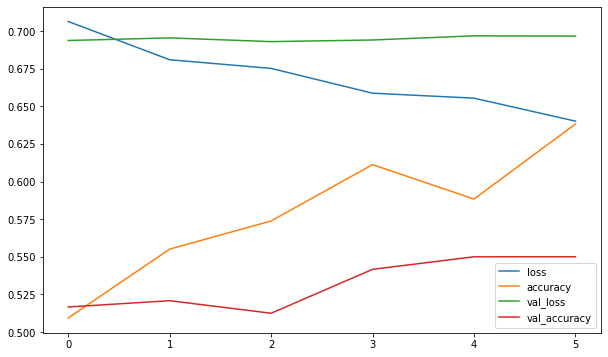

In [212]:
pd.DataFrame(history.history).plot(figsize=(10,6))

In [213]:
print('Train split:')
loss, acc = model.evaluate(X_train_pca, y_train, verbose=1)

print("Accuracy: %.2f%%" % (acc * 100))

Train split:
16/16 [==============================] - 0s 915us/step - loss: 0.6151 - accuracy: 0.6840
Accuracy: 68.40%


In [214]:
print('Test split:')
loss, acc = model.evaluate(X_test_pca, y_test, verbose=1)

print("Accuracy: %.2f%%" % (acc * 100))

Test split:
8/8 [==============================] - 0s 1ms/step - loss: 0.6966 - accuracy: 0.5500
Accuracy: 55.00%


[Text(0, 0.5, 'True: 0'), Text(0, 1.5, 'True: 1')]

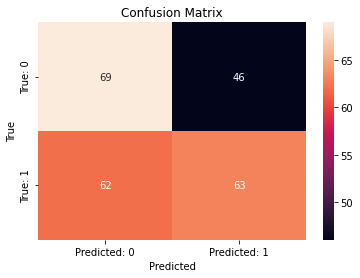

In [215]:
# Display confusion matrix results
from sklearn.metrics import confusion_matrix

ax = plt.subplot()
predicted = model.predict(X_test_pca)
predicted = (predicted > 0.5)

confusion = confusion_matrix(y_test, predicted)

sns.heatmap(confusion, annot=True, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(["Predicted: 0", "Predicted: 1"])
ax.yaxis.set_ticklabels(["True: 0", "True: 1"])

